In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors


In [3]:
!unzip -q "/content/new-plant-diseases-dataset.zip"

In [4]:
import cv2
import os
def load_images_from_folder1(folder):
    images = []
    image_id = []
    for filename in os.listdir(folder):
        #print(filename)
        img = cv2.imread(os.path.join(folder,filename))
        img = cv2.resize(img, (224, 224))
        #img = img.astype('float32')
        #img /= 255
        if img is not None:
            images.append(img)
            image_id.append(0)
    print("All labels and images are loaded successfully Grape_black_rot with label 0")

    return images, image_id
Grape_black_rot_image,Grape_black_rot_label= load_images_from_folder1('/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Grape___Black_rot')

All labels and images are loaded successfully Grape_black_rot with label 0


In [5]:
import cv2
import os
def load_images_from_folder2(folder):
    images = []
    image_id = []
    for filename in os.listdir(folder):
        #print(filename)
        img = cv2.imread(os.path.join(folder,filename))
        img = cv2.resize(img, (224, 224))
        #img = img.astype('float32')
        #img /= 255
        if img is not None:
            images.append(img)
            image_id.append(1)
    print("All labels and images are loaded successfully Grape_Esca with label 1")

    return images, image_id
Grape_Esca_image,Grape_Esca_label= load_images_from_folder2('/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Grape___Esca_(Black_Measles)')

All labels and images are loaded successfully Grape_Esca with label 1


In [6]:
import cv2
import os
def load_images_from_folder3(folder):
    images = []
    image_id = []
    for filename in os.listdir(folder):
        #print(filename)
        img = cv2.imread(os.path.join(folder,filename))
        img = cv2.resize(img, (224, 224))
        #img = img.astype('float32')
        #img /= 255
        if img is not None:
            images.append(img)
            image_id.append(2)
    print("All labels and images are loaded successfully Grape_leaf_blight with label 2")

    return images, image_id
Grape_Leaf_blight_image,Grape_Leaf_blight_label= load_images_from_folder3('/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)')

All labels and images are loaded successfully Grape_leaf_blight with label 2


In [7]:
import cv2
import os
def load_images_from_folder4(folder):
    images = []
    image_id = []
    for filename in os.listdir(folder):
        #print(filename)
        img = cv2.imread(os.path.join(folder,filename))
        img = cv2.resize(img, (224, 224))
        #img = img.astype('float32')
        #img /= 255
        if img is not None:
            images.append(img)
            image_id.append(3)
    print("All labels and images are loaded successfully Grape_healthy with label 3")

    return images, image_id
Grape_healthy_image,Grape_healthy_label= load_images_from_folder4('/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Grape___healthy')

All labels and images are loaded successfully Grape_healthy with label 3


In [9]:
import numpy as np

Grape_black_rot_label= np.asarray(Grape_black_rot_label)
Grape_Esca_label = np.asarray(Grape_Esca_label)
Grape_Leaf_blight_label = np.asarray(Grape_Leaf_blight_label)
Grape_healthy_label = np.asarray(Grape_healthy_label)

In [10]:

Grape_black_rot_array=np.asarray(Grape_black_rot_image)
Grape_Esca_array=np.asarray(Grape_Esca_image)
Grape_Leaf_blight_array=np.asarray(Grape_Leaf_blight_image)
Grape_healthy_array=np.asarray(Grape_healthy_image)


In [14]:
Grape_healthy_array.shape

(1692, 224, 224, 3)

In [ ]:
Meged_image = np.concatenate((
Grape_black_rot_array,
Grape_Esca_array,
Grape_Leaf_blight_array,
Grape_healthy_array
), axis=0)


In [ ]:
Meged_image.shape

(7222, 224, 224, 3)

In [ ]:
import numpy as np
Meged_label = np.concatenate((
Grape_black_rot_label,
Grape_Esca_label,
Grape_Leaf_blight_label,
Grape_healthy_label
), axis=0)

'''
,
Corn_Cercospora_label,
Corn_Common_Rust_label,
Corn_Leaf_Blight_label,
Corn_Healthy_label,
Grape_black_rot_label,
Grape_Esca_label,
Grape_Leaf_blight_label,
Grape_healthy_label,
Peach_bacterial_label,
Peach_healthy_label,
Potato_Early_blight_label,
Potato_Late_blight_label,
Potato_Healthy_label,
'''

Meged_label

array([0, 0, 0, ..., 3, 3, 3])

In [ ]:
#from keras.utils.np_utils import to_categorical
from tensorflow.keras.utils import to_categorical
label_final = to_categorical(Meged_label)
label_final

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [ ]:
import sklearn.model_selection as model_selection
x_train, x_test, label_train, label_test = model_selection.train_test_split(Meged_image, label_final, test_size=0.20, random_state=42)

In [ ]:
print(x_train.shape, x_test.shape, label_train.shape, label_test.shape)

(5777, 224, 224, 3) (1445, 224, 224, 3) (5777, 4) (1445, 4)


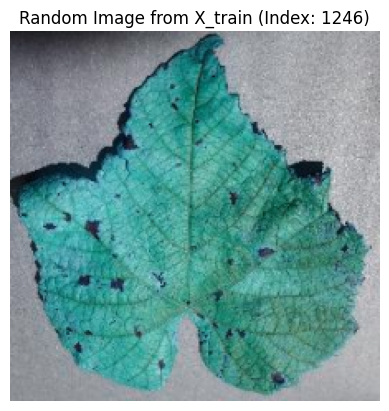

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assume X_train is a NumPy array of shape (num_samples, height, width, channels)
# Select a random index
random_index = np.random.randint(0, x_train.shape[0])

# Extract the image
image = x_train[random_index]

# Plot the image
plt.imshow(image.astype("uint8"))  # Ensure proper data type
plt.title(f"Random Image from X_train (Index: {random_index})")
plt.axis("off")
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, Model
from tensorflow.keras.preprocessing import image

# Define input shape and number of classes
input_shape = (224, 224, 3)
n_classes = 4

# Use the Functional API to build the model
inputs = layers.Input(shape=input_shape)
x = layers.BatchNormalization()(inputs)
x = layers.Conv2D(32, kernel_size=(3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, kernel_size=(3, 3), activation='relu')(x)
x = layers.Conv2D(64, kernel_size=(3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(128, kernel_size=(3, 3), activation='relu')(x)
x = layers.Conv2D(128, kernel_size=(3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(256, (3, 3), activation='relu')(x)
x = layers.Conv2D(256, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(512, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(n_classes, activation='softmax')(x)

# Create the model
model_1 = Model(inputs=inputs, outputs=outputs)
model_1.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 224, 224, 3)         │              12 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 107, 107, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 51, 51, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 49, 49, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 22, 22, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 20, 20, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       8,389,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             2

 Total params: 11,011,920 (42.01 MB)

 Trainable params: 11,011,914 (42.01 MB)

 Non-trainable params: 6 (24.00 B)

In [ ]:
import keras
from keras import layers
opt = keras.optimizers.Adam(learning_rate=0.0001)
model_1.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [ ]:
# Train the Model
history = model_1.fit(x_train, label_train,
                    validation_data=(x_test, label_test),
                    epochs=20,  # Change based on training performance
                    batch_size=32,
                    verbose=1)

Epoch 1/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 52s 205ms/step - accuracy: 0.5085 - loss: 1.0076 - val_accuracy: 0.7716 - val_loss: 0.5193
Epoch 2/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 53s 109ms/step - accuracy: 0.8556 - loss: 0.3554 - val_accuracy: 0.8138 - val_loss: 0.4811
Epoch 3/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 22s 120ms/step - accuracy: 0.9094 - loss: 0.2234 - val_accuracy: 0.9467 - val_loss: 0.1456
Epoch 4/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 39s 111ms/step - accuracy: 0.9425 - loss: 0.1544 - val_accuracy: 0.9633 - val_loss: 0.1035
Epoch 5/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 21s 115ms/step - accuracy: 0.9629 - loss: 0.1060 - val_accuracy: 0.9619 - val_loss: 0.1015
Epoch 6/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 21s 117ms/step - accuracy: 0.9642 - loss: 0.0932 - val_accuracy: 0.9806 - val_loss: 0.0586
Epoch 7/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 41s 116ms/step - accuracy: 0.9711 - loss: 0.0728 - val_accuracy: 0.9723 - val_loss: 0.0716
Epoch 8/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 42s 120ms/step - accuracy: 0.9768 - loss: 0

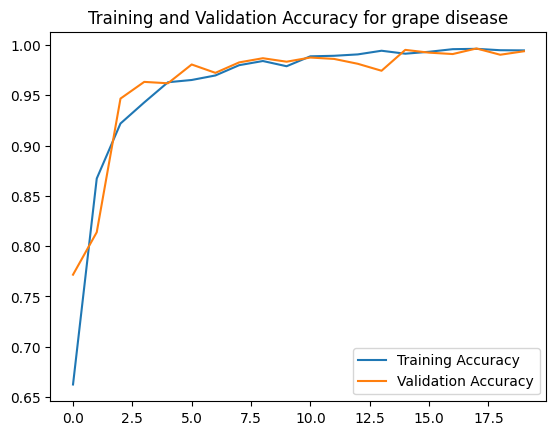

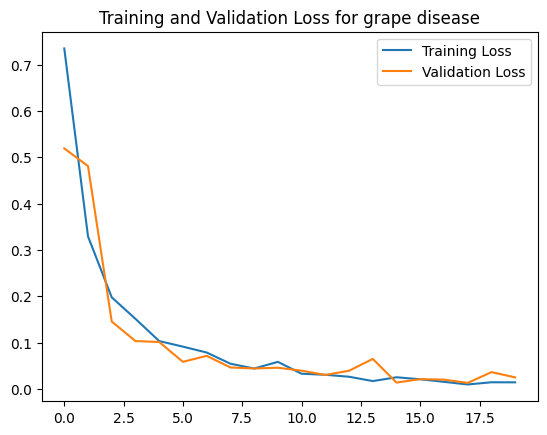

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
EPOCHS = 20
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
#plt.figure(figsize=(8,8))
#plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy for grape disease')
#plt.subplot(1, 2, 2)
plt.show()
plt.savefig('AccVal_acc')
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss for grape disease')
plt.show()
plt.savefig('LossVal_loss')

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model_1.evaluate(x_test, label_test, verbose=1)

print(f"Test Accuracy: {test_acc * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9900 - loss: 0.0380
Test Accuracy: 99.38%
Test Loss: 0.0251


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Get model predictions
y_pred = model_1.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert one-hot to class indices
y_true = np.argmax(label_test, axis=1)  # Convert one-hot to class indices

# Print Classification Report
print(classification_report(y_true, y_pred_classes))


46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       410
           1       1.00      0.98      0.99       380
           2       1.00      0.99      1.00       336
           3       1.00      1.00      1.00       319

    accuracy                           0.99      1445
   macro avg       0.99      0.99      0.99      1445
weighted avg       0.99      0.99      0.99      1445



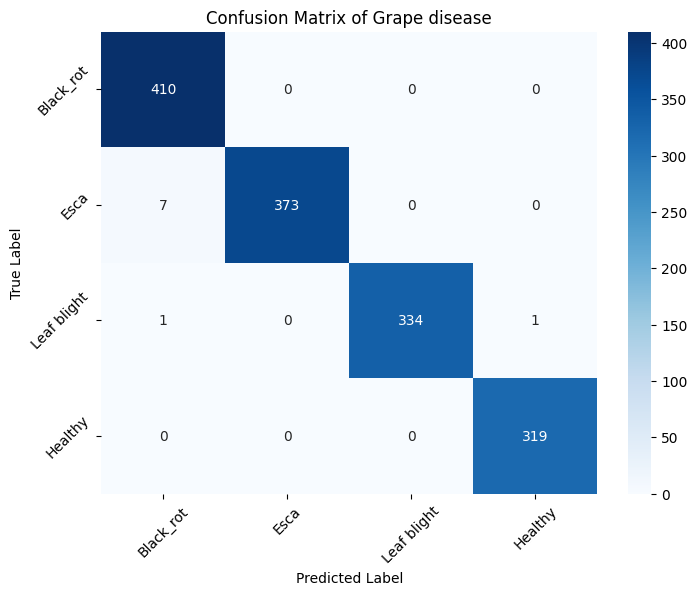

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define class labels
class_names = ["Black_rot", "Esca","Leaf blight","Healthy"]  # Replace with your actual class names

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix of Grape disease")
plt.xticks(rotation=45)  # Rotate class labels for better readability
plt.yticks(rotation=45)
plt.show()


In [ ]:
# Save the model in HDF5 format
model_1.save('/content/drive/MyDrive/grape_disease_model.h5')
print("Model saved as HDF5 (.h5) format successfully!")


Model saved as HDF5 (.h5) format successfully!


In [ ]:
model_1.save('/content/drive/MyDrive/crop_disease_models/cherry_disease_model.keras')


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/crop_disease_models/cherry_disease_model.keras'